In [183]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
listings_df = pd.read_csv('~/Downloads/archive/listings.csv')


In [185]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [186]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [187]:
#Checking the number of rows and columns in the listings dataframe
num_rows = listings_df.shape[0]
num_col = listings_df.shape[1]

print('This dataframe contains {} rows and {} columns'.format(num_rows, num_col))

This dataframe contains 3818 rows and 92 columns


In [188]:
#Converting 'price' from object to float64
listings_df['price'] = listings_df.price.str.replace('[$,]', '',regex=True).astype('float')

In [189]:
#Converting 'price' from object to float64
listings_df['weekly_price'] = listings_df.weekly_price.str.replace('[$,]', '',regex=True).astype('float')

In [190]:
#Converting 'price' from object to float64
listings_df['monthly_price'] = listings_df.monthly_price.str.replace('[$,]', '',regex=True).astype('float')

In [191]:
#Number of columns with no missing values
listings_no_nan = len(listings_df.columns[listings_df.isnull().sum()==0])
print('This dataframe contains {} columns with no missing values'.format(listings_no_nan))

#Number of columns with missing values
listings_nan = listings_df.shape[1] - listings_no_nan
print('This dataframe contains {} columns with missing values'.format(listings_nan))

This dataframe contains 47 columns with no missing values
This dataframe contains 45 columns with missing values


In [221]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [192]:
#Checking if there are null values in price
listings_df['price'].isnull().sum()

0

In [193]:
#Confirming neighbourhood names
listings_df['neighbourhood'].value_counts()

Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
Pike Market             2
South Park              2
North College Park      1
Fairmount Park          1
Roxhill                 1
Name: neighbourhood, Length: 81, dtype: int64

In [194]:
#Discovering the mean price for neighbourhoods
ng_prices = listings_df.groupby('neighbourhood').price.mean().sort_values(ascending=False)
ng_prices[:10]

neighbourhood
Fairmount Park         370.000000
Industrial District    245.000000
Portage Bay            241.428571
Westlake               197.000000
Alki                   196.652174
Montlake               195.947368
Magnolia               176.000000
Pike Place Market      175.512821
Windermere             174.700000
Queen Anne             168.764706
Name: price, dtype: float64

In [197]:
#Checking columns with all missing values
listings_df.columns[listings_df.isnull().all()]

Index(['license'], dtype='object')

In [198]:
#Checking columns with more than 75% of missing values
listings_df.columns[listings_df.isnull().sum()/len(listings_df) > 0.75]

Index(['square_feet', 'license'], dtype='object')

In [199]:
#Checking columns with more than 50% of missing values
listings_df.columns[listings_df.isnull().sum()/len(listings_df) > 0.50]


Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

In [200]:
#Deleting missing values for those columns
df_test = listings_df.dropna(subset=['square_feet', 'monthly_price', 'security_deposit'], how='any')


[Text(0.5, 0, 'monthly price')]

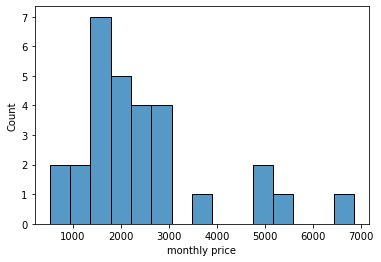

In [201]:
sns.histplot(data=df_test, x="monthly_price",bins=15).set(xlabel='monthly price')

/var/folders/cg/98gqmr1s2k3f4g3p6c7fdbs00000gn/T/ipykernel_93755/3945250175.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  listings_df.hist(ax = ax);


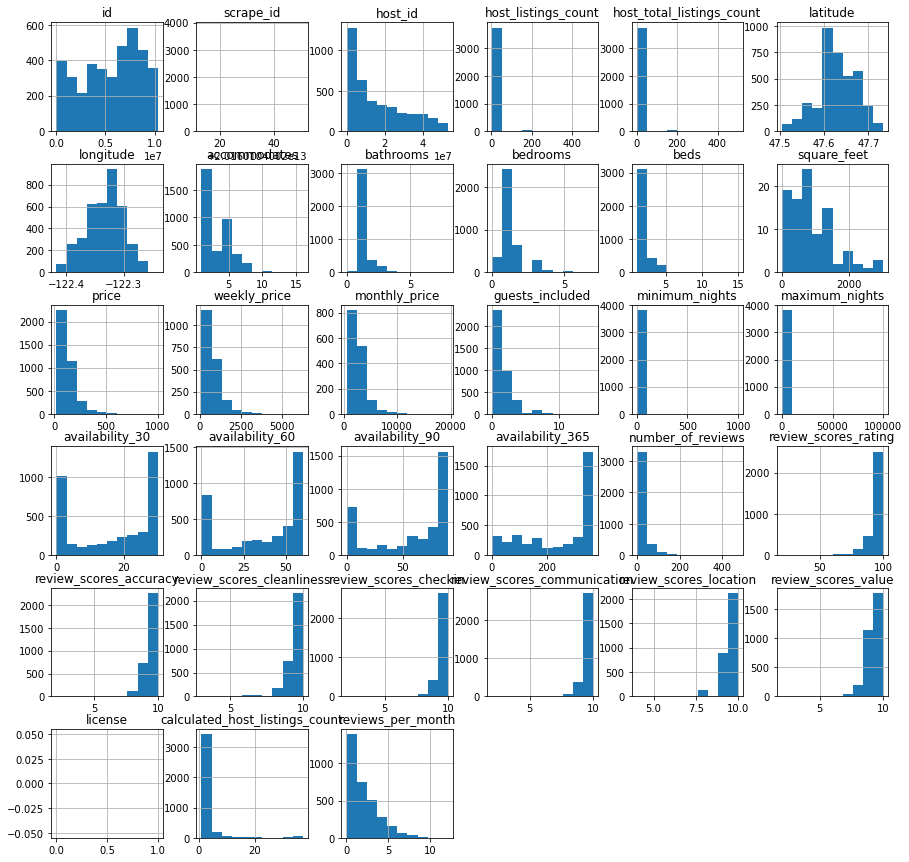

In [202]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
listings_df.hist(ax = ax);

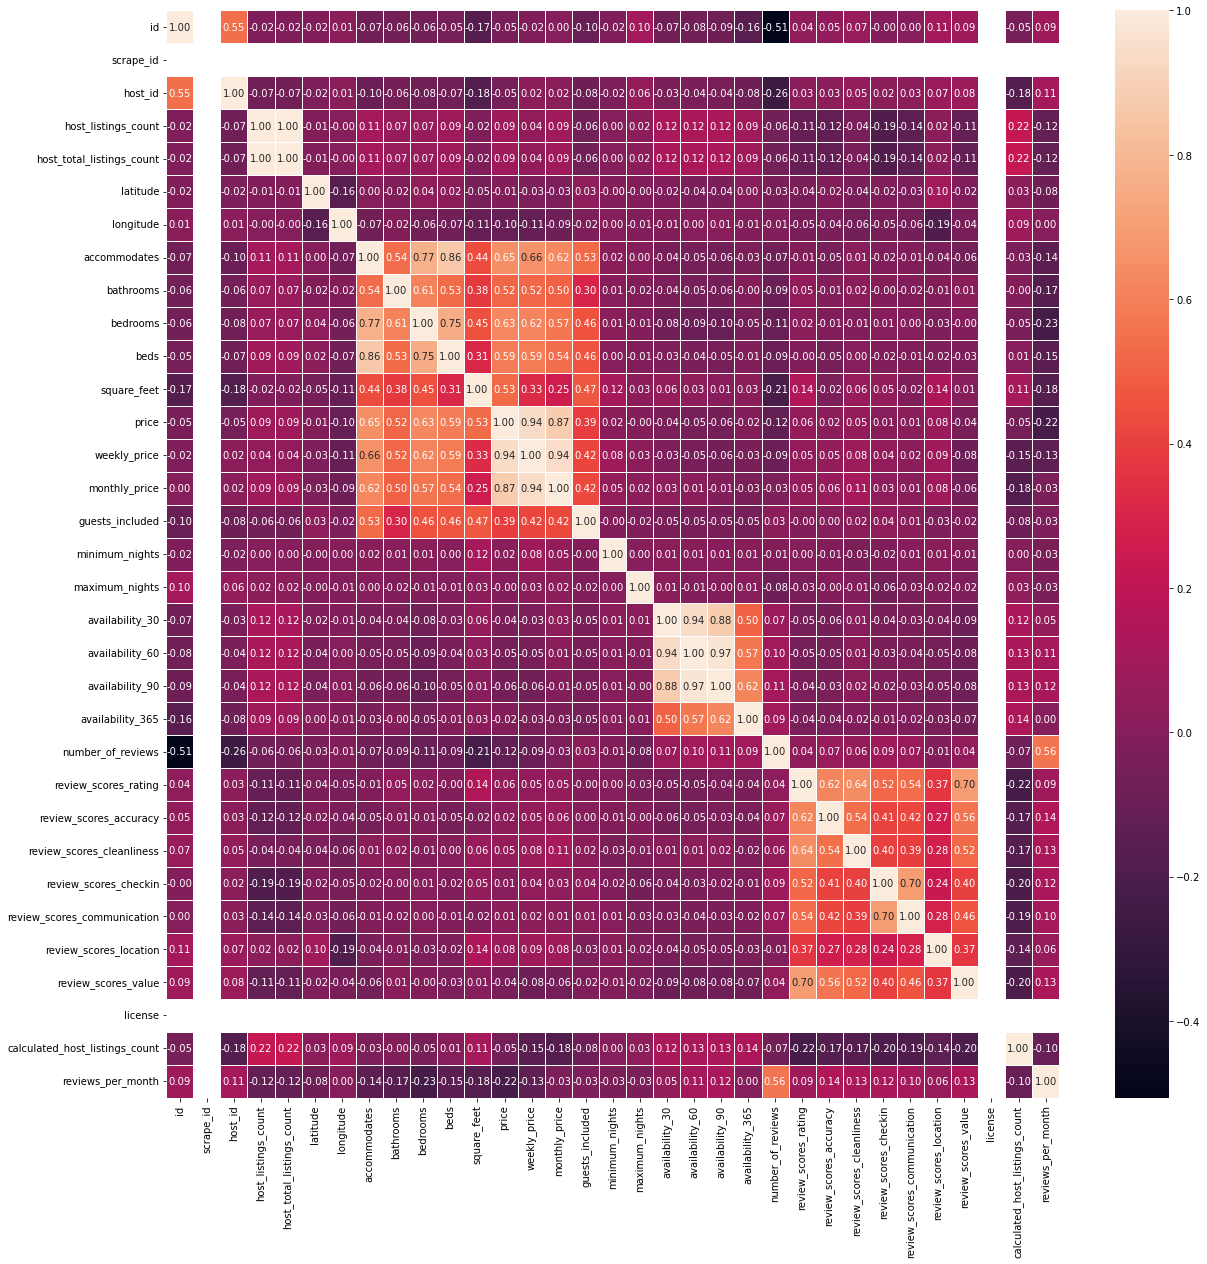

In [222]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(listings_df.corr(), annot=True, fmt='.2f', linewidths=.5, ax=ax);

In [205]:
listings_df.price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

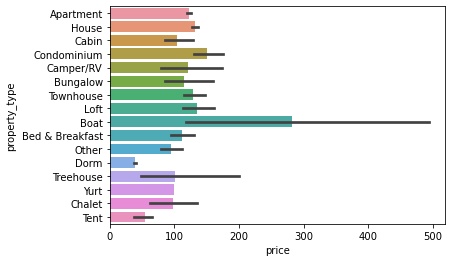

In [207]:
sns.barplot(x="price", y="property_type", data=listings_df);

In [209]:
listings_df_statistic = listings_df.groupby(['property_type'])['price'].describe().reset_index()
listings_df_statistic

,property_type,count,mean,std,min,25%,50%,75%,max
0,Apartment,1708.0,122.932670,66.617706,20.0,85.00,110.0,149.00,999.0
1,Bed & Breakfast,37.0,112.054054,55.840022,30.0,70.00,99.0,146.00,299.0
2,Boat,8.0,282.375000,281.327434,75.0,92.50,150.0,356.75,775.0
3,Bungalow,13.0,115.615385,75.226922,65.0,75.00,95.0,110.00,349.0
4,Cabin,21.0,104.666667,55.218053,52.0,85.00,95.0,100.00,300.0
5,Camper/RV,13.0,120.461538,95.375237,45.0,75.00,82.0,120.00,375.0
6,Chalet,2.0,98.500000,51.618795,62.0,80.25,98.5,116.75,135.0
7,Condominium,91.0,151.109890,111.091099,50.0,99.00,115.0,155.00,700.0
8,Dorm,2.0,39.500000,2.121320,38.0,38.75,39.5,40.25,41.0
9,House,1733.0,132.351414,106.877963,25.0,65.00,95.0,165.00,1000.0


In [211]:
#Discovering the mode price for the property_type
listings_df.groupby(['property_type'])['price'].agg(pd.Series.mode)

property_type
Apartment                         100.0
Bed & Breakfast                    99.0
Boat                              150.0
Bungalow                           70.0
Cabin               [85.0, 99.0, 100.0]
Camper/RV                          75.0
Chalet                    [62.0, 135.0]
Condominium                       150.0
Dorm                       [38.0, 41.0]
House                              55.0
Loft                              100.0
Other              [40.0, 121.0, 150.0]
Tent                               65.0
Townhouse                         150.0
Treehouse           [48.0, 55.0, 200.0]
Yurt                              100.0
Name: price, dtype: object

In [212]:
#Statistics for neighborhoods
statistic_neighborhood = listings_df.groupby(['neighbourhood_cleansed'])['price'].describe().reset_index()
statistic_neighborhood = statistic_neighborhood.sort_values(by=['mean'],ascending=False)
expensive_neighborhood = statistic_neighborhood[0:10]
statistic_neighborhood 

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
73,Southeast Magnolia,17.0,231.705882,225.117682,48.0,110.00,150.0,250.00,950.0
61,Portage Bay,14.0,227.857143,197.523458,79.0,104.25,132.5,255.25,750.0
83,Westlake,17.0,194.470588,173.057475,65.0,85.00,150.0,200.00,775.0
81,West Queen Anne,65.0,187.769231,170.476425,20.0,90.00,130.0,175.00,975.0
48,Montlake,19.0,182.789474,171.700508,55.0,94.50,125.0,180.00,750.0
...,...,...,...,...,...,...,...,...,...
54,North Delridge,32.0,76.375000,26.881760,35.0,55.00,72.5,95.00,148.0
24,Georgetown,8.0,76.125000,15.994977,50.0,68.75,72.5,90.00,99.0
70,South Delridge,12.0,74.666667,31.804326,41.0,49.50,67.5,96.00,150.0
56,Olympic Hills,16.0,71.687500,48.098120,35.0,52.25,55.5,74.00,240.0


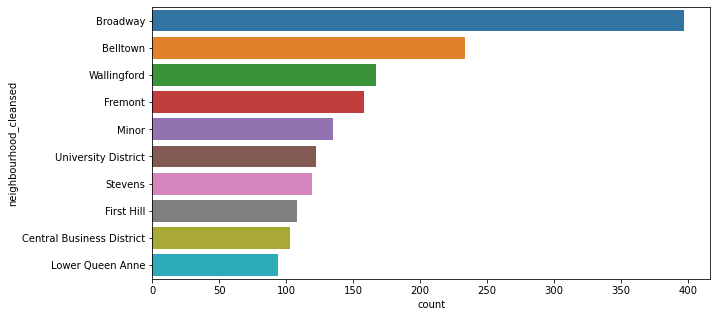

In [214]:
#Most popular neighborhoods
fig, ax = plt.subplots(figsize=(10, 5))
statistic_neighborhood = statistic_neighborhood.sort_values(by=['count'],ascending=False)
sns.barplot(x="count", y="neighbourhood_cleansed", data=statistic_neighborhood[0:10]);

In [216]:
#Most common neighborhood statistics
statistic_neighborhood[0:10]

,neighbourhood_cleansed,count,mean,std,min,25%,50%,75%,max
9,Broadway,397.0,123.889169,77.628634,25.0,79.00,100.0,150.0,673.0
4,Belltown,234.0,162.893162,110.523031,35.0,112.25,139.0,175.0,999.0
79,Wallingford,167.0,128.431138,99.054779,39.0,65.00,100.0,152.5,680.0
21,Fremont,158.0,129.056962,80.948615,35.0,75.00,106.0,150.0,500.0
47,Minor,135.0,121.800000,69.760015,37.0,75.00,100.0,150.0,425.0
76,University District,122.0,93.639344,59.721816,28.0,53.50,85.0,105.0,350.0
74,Stevens,119.0,133.210084,97.235767,22.0,80.00,120.0,150.0,545.0
20,First Hill,108.0,136.425926,58.100815,40.0,100.00,127.0,166.0,500.0
12,Central Business District,103.0,164.213592,68.148001,40.0,118.50,149.0,185.5,365.0
38,Lower Queen Anne,94.0,138.202128,67.170875,38.0,96.25,119.0,172.5,498.0


In [223]:
def data_cleaning (df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix containing all features to predict
    y - The corresponding prediction   
    
    This function perform to obtain the correct X and y objects

    '''
    
    #Select numerical values
    numerical = listings_df[['accommodates', 'bathrooms', 'bedrooms', 'beds','guests_included',\
                             'number_of_reviews', 'review_scores_rating', 'reviews_per_month'] ]
    
    # Impute missing values with mean for numeric columns
    fill_mean = lambda col: col.fillna(col.mean())
    numerical = numerical.apply(fill_mean, axis=0)
    
    #Select categorical columns
    categorical = listings_df[['property_type','neighbourhood_cleansed','bed_type'] ]
  
    #Create dummy columns for all categorical variables
    categorical = pd.get_dummies(categorical, dummy_na=False, drop_first=True)
    
    #Merge numerical and categorical features to one matrix
    X = pd.concat([numerical,categorical], axis=1)
    
    #Create y as Price column
    y = listings_df['price']
    
    return X, y
    
#Use the function to create X and y
X, y = data_prepossessing(listings_df)

In [224]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [227]:
#Initialization of Linear Regression and training  
lm_model = LinearRegression(normalize=True)

#Instantiate model
lm_model.fit(X_train, y_train)

# Predict model
y_test_predict = lm_model.predict(X_test)

In [229]:
y_train_predict = lm_model.predict(X_train)
test_score = r2_score(y_test, y_test_predict)
train_score = r2_score(y_train, y_train_predict)

print("train score={}, test score={}".format(train_score, test_score))

train score=0.5696649512857576, test score=0.575320048960084
